# Beispiele zu quadratischen Formen

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve_triangular, eig, eigvals, norm, qr, svd
from sympy import symbols, lambdify

Mesh Grid für die Visualisierung

In [2]:
xp = np.linspace(-2,2,30)
Xp,Yp = np.meshgrid(xp,xp)

Allgemeine quadratische Form

$$\begin{split}
f : \mathbb{R}^n & \to\mathbb{R}\\
\vec{x} &\mapsto f(\vec{x}) = \vec{x}^T\cdot a \cdot \vec{x} + b\cdot\vec{x} + c,\end{split}$$

wobei $a\in\mathbb{R}^{n\times n}$, $b\in\mathbb{R}^n$ und $c\in\mathbb{R}$ sei.

In [3]:
def getQuadForm(a,b,c, lam = True):
    x,y = symbols('x,y')
    u = np.array([x,y])
    expr=u@a@u+b@u+c
    if lam:
        return lambdify((x,y),expr)
    else:
        return expr

(chap:ellipticexmp)=
## Elliptisch

Die Matrix $a$ muss positiv definit sein:

In [4]:
a = np.array([[2,1],[0,1]])
b = np.array([0,0])
c = 0

In [5]:
getQuadForm(a,b,c, lam = False)

2*x**2 + y*(x + y)

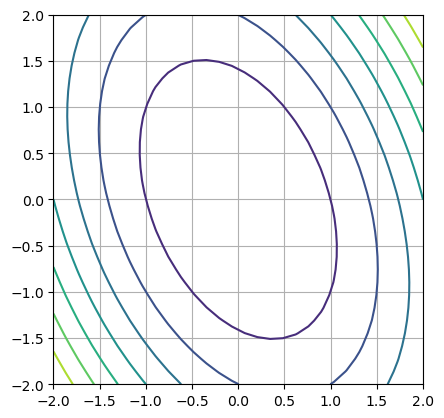

In [6]:
plt.contour(Xp,Yp,getQuadForm(a,b,c)(Xp,Yp))
plt.gca().set_aspect(1)
plt.grid()
plt.show()

In [7]:
a = np.array([[-2,1],[0,-1]])
b = np.array([0,0])
c = 0

In [8]:
getQuadForm(a,b,c, lam = False)

-2*x**2 + y*(x - y)

In [9]:
eigvals(a)

array([-2.+0.j, -1.+0.j])

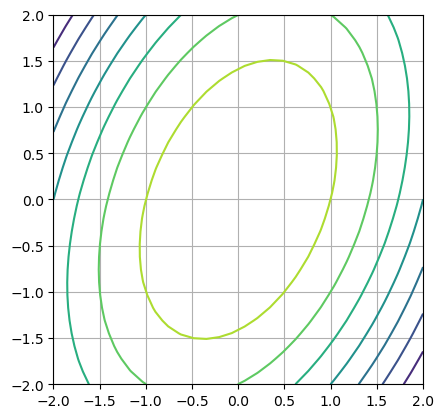

In [10]:
plt.contour(Xp,Yp,getQuadForm(a,b,c)(Xp,Yp))
plt.gca().set_aspect(1)
plt.grid()
plt.show()

(chap:parabolexmp)=
## Parabolisch

### Ein kleiner Ausrutscher in die lineare Algebra: Berechnung des Kern einer Matrix

Der Kern einer linearen Abbildung $A: \mathbb{R}^n \to \mathbb{R}^m$ ist definiert durch die Menge der Vektoren, welche die lineare Abbildung auf den Nullvektor abbildet. Daher

$$\mathop{kern} A := \{x \in \mathbb{R}^d | A\cdot x = 0\}$$


#### Mit Hilfe der Eigenwertzerlegung

Eine numerische Approximation des Kern einer (quadratischen) Matrix können wir mit Hilfe der zum Eigenwert $\lambda = 0$ zugehörigen Eigenvektoren bestimmen. Das funktioniert solange die Vielfachheit eins ist. Im Fall einer Vielfachheit, ist der Eigenvektor komplexkonjugiert, womit wir mit dem Ansatz nicht alle Basisvektoren für den Nullraum erhalten. In dem Fall müsste man die Hauptvektoren bestimmen.

Als erstes erstellen wir eine 5x5 Matrix mit Rang 3:

In [11]:
a = np.random.randint(-9,9,size=(5,3))
# build quadratic matrix with lower rank
a = np.vstack((a.T,a[:,0]-a[:,1],a[:,2]-a[:,1])).T
a

array([[ 5,  1,  1,  4,  0],
       [ 0,  4,  5, -4,  1],
       [ 4,  7, -2, -3, -9],
       [ 0,  7,  2, -7, -5],
       [-4, -5, -3,  1,  2]])

In [12]:
# Beispiel einer Matrix mit komplex konjugierten Eigenvektoren für den Eigenwert 0.
#a = np.array([[ 3, -7,  6, 10, 13],
#       [ 8,  1,  8,  7,  7],
#       [ 7, -8, -5, 15,  3],
#       [ 2, -7, -8,  9, -1],
#       [-5, -6, -8,  1, -2]])

Für die Eigenwerte bzw. Eigenvektoren zum Eigenwert 0 folgt

In [13]:
ew,ev = eig(a)
ns1=ev[:,(np.abs(ew)<1e-13)] # wir sind für das weitere nur am Realanteil interessiert
ns1

array([[-0.40531107, -0.56767276],
       [ 0.7029998 ,  0.59498209],
       [-0.29768873, -0.02730933],
       [ 0.40531107,  0.56767276],
       [ 0.29768873,  0.02730933]])

In [14]:
a@ns1

array([[ 0.00000000e+00,  2.22044605e-15],
       [-5.55111512e-16, -2.14758766e-15],
       [ 2.33146835e-15,  3.43475248e-16],
       [ 5.55111512e-16, -2.47371568e-15],
       [-4.44089210e-16, -1.87350135e-16]])

In [15]:
[norm(a@ni,np.inf) for ni in ns1.T]

[1.887379141862766e-15, 2.220446049250313e-15]

#### Mit Hilfe der Singulärwertzerlegung

Ein analoger Zugang, jedoch mit der Singulärwertzerlegung liefert immer eine reellwertige Lösung und den gesammten Nullraum:

In [17]:
atol=1e-13 # absolute Toleranz
rtol=0 # relative Toleranz
u, s, vh = svd(a) # Singulärwerte sind 
tol = max(atol, rtol * s[0])
nnz = (s >= tol).sum()
ns2 = vh[nnz:].conj().T
ns2

array([[ 0.58249452, -0.18894478],
       [-0.21019084,  0.67514429],
       [-0.37230368, -0.48619951],
       [-0.58249452,  0.18894478],
       [ 0.37230368,  0.48619951]])

In [18]:
a@ns2

array([[-2.22044605e-15, -8.88178420e-16],
       [ 1.55431223e-15,  1.72084569e-15],
       [ 2.88657986e-15,  1.83186799e-15],
       [ 4.21884749e-15,  2.49800181e-15],
       [-3.33066907e-16, -8.88178420e-16]])

In [19]:
[norm(a@ni,np.inf) for ni in ns2.T]

[4.218847493575595e-15, 2.4980018054066022e-15]

Wir zeigen, dass die Vektoren jeweilen durch Linearkombinationen der anderen darstellbar sind. Womit gezeigt ist, dass die Beschreibungen des Nullraums identisch sind.

In [20]:
q,r = qr(ns1,mode='economic')
r

array([[1.        , 0.89469975],
       [0.        , 0.44666805]])

In [21]:
sol=solve_triangular(r,q.T@ns2)
sol

array([[ 1.43903716,  1.715049  ],
       [-2.05356379, -0.89168199]])

In [22]:
ns1@sol-ns2

array([[-3.33066907e-16, -4.16333634e-16],
       [ 2.77555756e-16,  3.33066907e-16],
       [ 5.55111512e-17, -1.66533454e-16],
       [-2.22044605e-16,  1.66533454e-16],
       [ 5.55111512e-17, -2.77555756e-16]])

Der Vorteil der Singulärwertzerlegung sieht man im Resultat der QR-Zerlegung: die beiden Vektoren sind orthogonal. Die $R$ Matrix ist diagonal.

In [23]:
q,r = qr(ns2,mode='economic')
r

array([[-1.00000000e+00, -1.94289029e-16],
       [ 0.00000000e+00, -1.00000000e+00]])

In [24]:
sol=solve_triangular(r,q.T@ns1)
sol

array([[-0.39828586, -0.7660576 ],
       [ 0.91726134,  0.64277193]])

In [25]:
ns2@sol-ns1

array([[ 1.66533454e-16,  0.00000000e+00],
       [-3.33066907e-16, -1.11022302e-16],
       [ 4.44089210e-16,  2.35922393e-16],
       [-1.66533454e-16, -3.33066907e-16],
       [ 5.55111512e-17,  1.45716772e-16]])

Die beiden Beschreibungen sind bis auf numerische Rundung identisch.

### Zurück zur quadratischen Form

Betrachten wir das erwähnte Beispiel: Der Nullraum ist in dem Fall offensichtlich gegeben durch $(0,1)^T$ und entsprechend kompatibel mit dem $b$ Vektor.

In [26]:
a = np.array([[1,0],[0,0]])
b = np.array([0,1])
c = 0

In [27]:
getQuadForm(a,b,c, lam = False)

x**2 + y

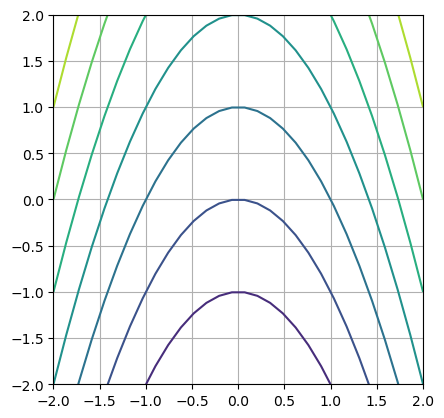

In [28]:
plt.contour(Xp,Yp,getQuadForm(a,b,c)(Xp,Yp))
plt.gca().set_aspect(1)
plt.grid()
plt.show()

(chap:hyperexmp)=
## Hyperbolisch

Wir betrachten das Beispiel:

In [29]:
a = np.array([[1,0],[0,-1]])
b = np.array([0,0])
c = 0

In [30]:
getQuadForm(a,b,c, lam = False)

x**2 - y**2

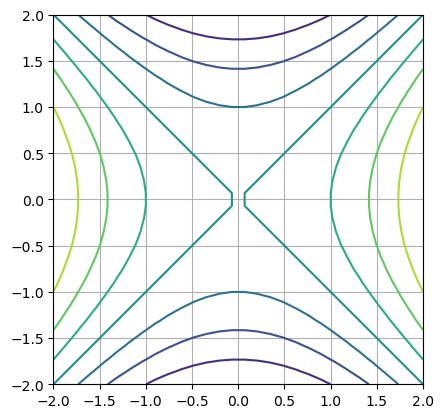

In [31]:
plt.contour(Xp,Yp,getQuadForm(a,b,c)(Xp,Yp))
plt.gca().set_aspect(1)
plt.grid()
plt.show()